# Problem Statement

**Classifying Dogs and Cats using Convolutional Neural Network(CNN)**

**Importing the required packages**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import sklearn
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#Check the folder name
#Make sure your path is ./Cats And Dogs/dataset/training_set/cats(dogs)
#Make sure your path is ./Cats And Dogs/dataset/testing_set/cats(dogs)

PATH = '/content/drive/My Drive/DataSets/Cats And Dogs/'
'''
training_set = os.path.join(PATH,'training_set')
testing_set = os.path.join(PATH,'testing_set')

train_dogs = os.path.join(training_set,'dogs')
train_cats = os.path.join(training_set,'cats')

test_dogs = os.path.join(testing_set,'dogs')
test_cats = os.path.join(testing_set,'cats')
'''

"\ntraining_set = os.path.join(PATH,'training_set')\ntesting_set = os.path.join(PATH,'testing_set')\n\ntrain_dogs = os.path.join(training_set,'dogs')\ntrain_cats = os.path.join(training_set,'cats')\n\ntest_dogs = os.path.join(testing_set,'dogs')\ntest_cats = os.path.join(testing_set,'cats')\n"

In [4]:
#Counting the number of Training and testing images
'''
print('Number of training dataset for dogs: ',len(os.listdir(train_dogs)))
print('Number of training dataset for cats: ',len(os.listdir(train_cats)))
print('Total Training dataset:', len(os.listdir(train_dogs)) + len(os.listdir(train_cats)))

print('\nNumber of testing dataset for dogs: ',len(os.listdir(test_dogs)))
print('Number of testing dataset for cats: ',len(os.listdir(test_cats)))
print('Total Testing dataset:', len(os.listdir(test_dogs)) + len(os.listdir(test_cats)))
'''

"\nprint('Number of training dataset for dogs: ',len(os.listdir(train_dogs)))\nprint('Number of training dataset for cats: ',len(os.listdir(train_cats)))\nprint('Total Training dataset:', len(os.listdir(train_dogs)) + len(os.listdir(train_cats)))\n\nprint('\nNumber of testing dataset for dogs: ',len(os.listdir(test_dogs)))\nprint('Number of testing dataset for cats: ',len(os.listdir(test_cats)))\nprint('Total Testing dataset:', len(os.listdir(test_dogs)) + len(os.listdir(test_cats)))\n"

In [5]:
#train folder inside the training_set contains images for training for both dog and cat

#Creating dataframe for training
filenames = os.listdir("/content/drive/My Drive/DataSets/Cats And Dogs/train")
categories = []

for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1) #assigning dog as value 1
    else:
        categories.append(0) #assigning cat as value 0

dog_cat_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [6]:
dog_cat_df.head()

,filename,category
0,dog.3616.jpg,1
1,dog.3610.jpg,1
2,dog.3617.jpg,1
3,dog.3609.jpg,1
4,dog.3620.jpg,1


In [7]:
dog_cat_df.tail()

,filename,category
7855,cat.91.jpg,0
7856,cat.941.jpg,0
7857,cat.937.jpg,0
7858,cat.929.jpg,0
7859,cat.913.jpg,0


# Applying CNN Model

**Importing some more required packages** 

In [8]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

Using TensorFlow backend.


**Defining Constants**

In [9]:
IMAGE_WIDTH=150
IMAGE_HEIGHT=150
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

## Building Model

In [10]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))# '2' because we have two classes cat and dog

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary() #printing the summary

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)       

**Call Back, Early Stopping and Reducing Learning Rate**

In [11]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

To prevent overfitting stop learning after 15 epoch and if `loss` is not decreased

In [12]:
earlystop = EarlyStopping(monitor = 'loss', patience = 15)

In [13]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'accuracy', 
                                            patience = 3, 
                                            verbose = 1, 
                                            factor = 0.5, 
                                            min_lr = 0.00001 #minimum learning rate
                                           )

Reducing learning rate if `accuracy` is not increased for 3 steps.

In [14]:
callbacks = [earlystop, learning_rate_reduction]

In [15]:
dog_cat_df["category"] = dog_cat_df["category"].replace({0: 'cat', 1: 'dog'}) 

In [16]:
dog_cat_df = dog_cat_df.reset_index(drop=True)

In [17]:
dog_cat_df.head()

,filename,category
0,dog.3616.jpg,dog
1,dog.3610.jpg,dog
2,dog.3617.jpg,dog
3,dog.3609.jpg,dog
4,dog.3620.jpg,dog


In [18]:
dog_cat_df.tail()

,filename,category
7855,cat.91.jpg,cat
7856,cat.941.jpg,cat
7857,cat.937.jpg,cat
7858,cat.929.jpg,cat
7859,cat.913.jpg,cat


In [19]:
total_train = dog_cat_df.shape[0]
batch_size = 15 #Number of images we need to yeild in one go

## Preparing Training Data

In [20]:
#ImageDataGenerator is in keras used for reading images from disk/datafram

train_img_generator = ImageDataGenerator(rescale = 1./255)

*ImageDataGenerator* gives us the object to read the images from a array/folders containing images.
The `rescale` is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our model to process, so we target values between 0 and 1.

In [21]:
train_data_generator = train_img_generator.flow_from_dataframe(
    dog_cat_df, #name of the data set
    PATH+'/train', #path where images are present
    x_col='filename', #column/attribute name
    y_col='category',
    target_size=IMAGE_SIZE, #resizizng input image
    class_mode='categorical', 
    batch_size=batch_size
)

Found 7860 validated image filenames belonging to 2 classes.


In [22]:
#here next returns us (x_train,y_train) where x_train is feature and y_train is label, 
#we don't need labels so using '_' we are discarding it.

training_images , _ = next(train_data_generator) 

In [23]:
def plottingImages(images_arr):
    fig , axes = plt.subplots(2, 5, figsize=(25,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

**Sample Images**

In [24]:
plottingImages(training_images[:10])

Output hidden; open in https://colab.research.google.com to view.

## Fitting the Model

In [ ]:
epochs = 35
history = model.fit_generator(
    train_data_generator , 
    epochs=epochs,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/35
524/524 [==============================] - 1982s 4s/step - loss: 0.8945 - accuracy: 0.6042
Epoch 2/35
524/524 [==============================] - 582s 1s/step - loss: 0.5959 - accuracy: 0.6899
Epoch 3/35
524/524 [==============================] - 583s 1s/step - loss: 0.4953 - accuracy: 0.7676
Epoch 4/35
524/524 [==============================] - 587s 1s/step - loss: 0.4467 - accuracy: 0.7969
Epoch 5/35
524/524 [==============================] - 577s 1s/step - loss: 0.4040 - accuracy: 0.8220
Epoch 6/35
524/524 [==============================] - 577s 1s/step - loss: 0.3646 - accuracy: 0.8420
Epoch 7/35
524/524 [==============================] - 579s 1s/step - loss: 0.3377 - accuracy: 0.8552
Epoch 8/35
524/524 [==============================] - 578s 1s/step - loss: 0.2991 - accuracy: 0.8721
Epoch 9/35
524/524 [==============================] - 582s 1s/step - loss: 0.2745 - accuracy: 0.8847
Epoch 10/35
524/524 [==============================] - 588s 1s/step - loss: 0.2407 - accur

In [ ]:
model.save_weights(PATH+"Model_dog_cat_b"+batch_size+"-e"+epochs) #Save to model nodes to use in future

### Plotting Graph for Training Loss and Training Accuracy

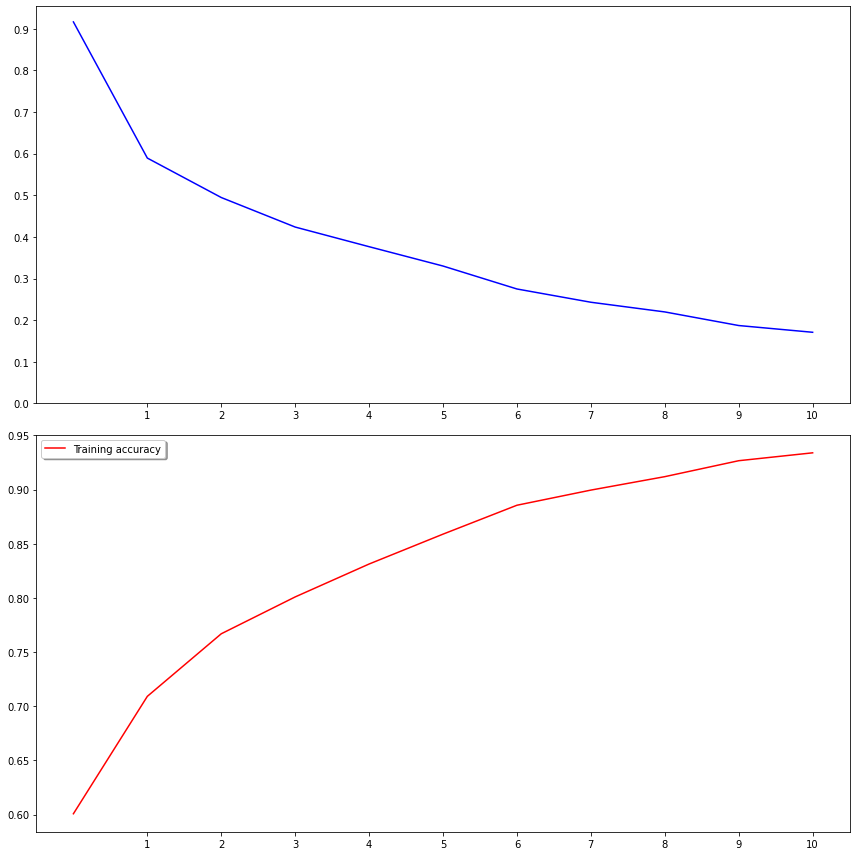

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='r', label="Training accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))


legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

### Loading Images for Testing

In [ ]:
test_filenames = os.listdir(PATH+"/test")

test_df = pd.DataFrame({
    'filename': test_filenames})

nb_samples = test_df.shape[0]

In [ ]:
test_img_generator = ImageDataGenerator(rescale = 1./255)

In [ ]:
test_data_generator = test_img_generator.flow_from_dataframe(
    test_df, 
    PATH+"/test",
    x_col='filename',
    y_col=None,
    target_size=IMAGE_SIZE,
    class_mode=None, #'None' because we want just the images
    batch_size=batch_size,
    shuffle=False #'False' because testing is to be done order
)

Found 2000 validated image filenames.


## Predicting Images

In [ ]:
predict = model.predict_generator(test_data_generator, steps = np.ceil(nb_samples/batch_size))

In [ ]:
test_df['category'] = np.argmax(predict, axis = -1) #Adding predicted value to the dataframe

In [ ]:
test_df.head()

,filename,category
0,dog.4001.jpg,1
1,dog.4002.jpg,1
2,dog.4003.jpg,1
3,dog.4004.jpg,1
4,dog.4005.jpg,1


**Mapping the Predicted labels with their Unique ids**
(Here filename)

In [ ]:
label_map = dict((v,k) for k,v in train_data_generator.class_indices.items()) #to find out what you predicted for which image
test_df['category'] = test_df['category'].replace(label_map)

In [ ]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 }) #replace dog by 1 and cat by 0

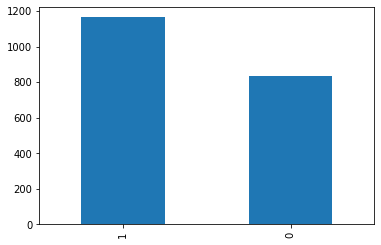

In [ ]:
test_df['category'].value_counts().plot.bar()

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2000 non-null   object
 1   category  2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [ ]:
test_df['category'].value_counts() #0-cats 1-dogs (predicted)

1    1165
0     835
Name: category, dtype: int64

## Plotting Images with predicted value

**The Number written inside the bracket is showing the predicted value**

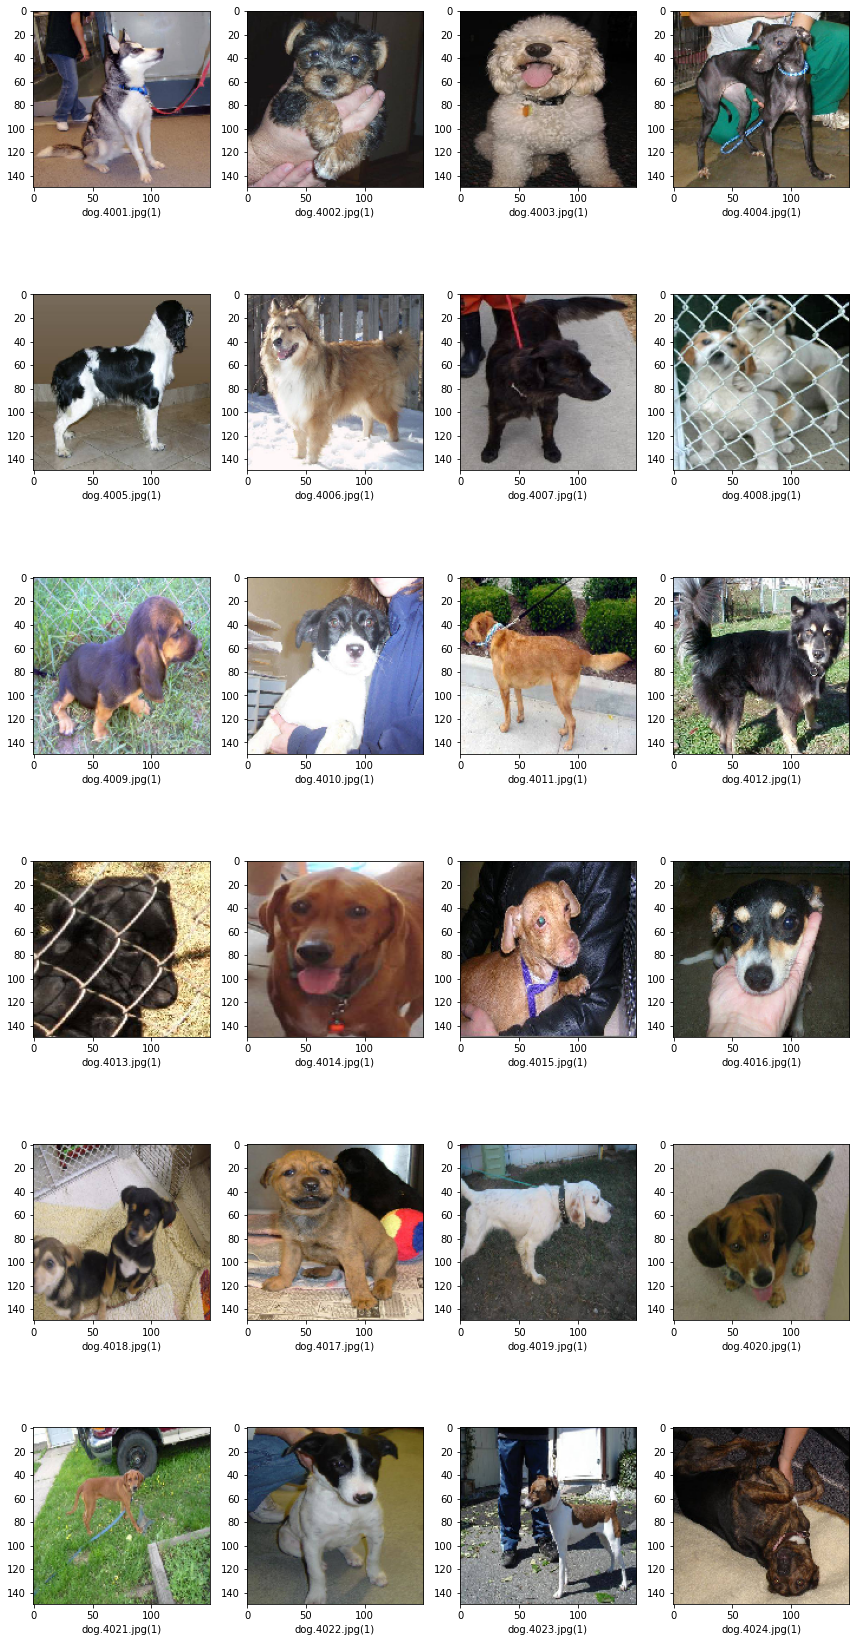

In [ ]:
sample_test = test_df.head(24)
sample_test.head()

plt.figure(figsize = (12, 24))

for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img(PATH+"/test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 4, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' ) #predicted value is written inside the bracket

plt.tight_layout()

plt.show()

**Number of Images Predicted correctly**

In [ ]:
#0-cats 1-dogs
correctly_predicted_count = 0 
for index, row in test_df.iterrows():
    filename = row['filename']
    category = row['category']
    if filename.split('.')[0] == 'dog' and category == 1:
        correctly_predicted_count+=1
    if filename.split('.')[0] == 'cat' and category == 0:
        correctly_predicted_count+=1
        
print('Number of images correctly predicted(Out of 2000): ',correctly_predicted_count)

Number of images correctly predicted(Out of 2000):  1675


## Confusion Matrix and Classification Report

In [ ]:
from sklearn.metrics import confusion_matrix ,classification_report

In [ ]:
filenames = os.listdir(PATH+"/test")
categories = []

for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1) #assigning dog as value 1
    else:
        categories.append(0) #assigning cat as value 0

#original data, which having true value
original_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:
print(confusion_matrix(original_df['category'],
                       test_df['category']))

[[755 245]
 [ 80 920]]


In [ ]:
print(classification_report(original_df['category'],
                                      test_df['category'],
                                      labels=None,
                                      target_names=None,
                                      sample_weight=None,
                                      digits=2,
                                      output_dict=False,
                                      zero_division='warn'))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1000
           1       0.79      0.92      0.85      1000

    accuracy                           0.84      2000
   macro avg       0.85      0.84      0.84      2000
weighted avg       0.85      0.84      0.84      2000



## Saving the result into CSV file

In [ ]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv(PATH+'submission_dog_cat_b'+batch_size+"-e"+epochs.csv', index=False)